In [1]:
import pandas as pd
import numpy as np

In [3]:
fake_news_file = 'Fake.csv'
true_news_file = 'True.csv'

In [15]:
df_fake = pd.read_csv(fake_news_file)
df_fake['label'] = 0 # Assign label 0 for fake news
print(f"Dataset '{fake_news_file}' loaded. Assigned label '0'.")

Dataset 'Fake.csv' loaded. Assigned label '0'.


In [17]:
df_true = pd.read_csv(true_news_file)
df_true['label'] = 1 # Assign label 1 for true news
print(f"Dataset '{true_news_file}' loaded. Assigned label '1'.")


Dataset 'True.csv' loaded. Assigned label '1'.


In [21]:
# Combine the two datasets
print("\nCombined fake and true news datasets...")
df_news = pd.concat([df_fake, df_true]).reset_index(drop=True)


Combined fake and true news datasets...


In [23]:
# Shuffle the combined dataset to mix fake and true articles
df_news = df_news.sample(frac=1, random_state=42).reset_index(drop=True)
print("Dataset shuffled.")

Dataset shuffled.


In [25]:
print("\nCombined Dataset Info:")
df_news.info()



Combined Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.7+ MB


In [27]:
print("\nFirst 5 rows of the combined dataset (after shuffling):")
print(df_news.head())


First 5 rows of the combined dataset (after shuffling):
                                               title  \
0  Ben Stein Calls Out 9th Circuit Court: Committ...   
1  Trump drops Steve Bannon from National Securit...   
2  Puerto Rico expects U.S. to lift Jones Act shi...   
3   OOPS: Trump Just Accidentally Confirmed He Le...   
4  Donald Trump heads for Scotland to reopen a go...   

                                                text       subject  \
0  21st Century Wire says Ben Stein, reputable pr...       US_News   
1  WASHINGTON (Reuters) - U.S. President Donald T...  politicsNews   
2  (Reuters) - Puerto Rico Governor Ricardo Rosse...  politicsNews   
3  On Monday, Donald Trump once again embarrassed...          News   
4  GLASGOW, Scotland (Reuters) - Most U.S. presid...  politicsNews   

                  date  label  
0    February 13, 2017      0  
1       April 5, 2017       1  
2  September 27, 2017       1  
3         May 22, 2017      0  
4       June 24, 2016    

In [31]:
#To check missing values in combined dataset
print("Missing values in each column of combined dataset: ")
print(df_news.isnull().sum())

Missing values in each column of combined dataset
title      0
text       0
subject    0
date       0
label      0
dtype: int64


In [33]:
# Check the distribution of the target variable ('label')
print("\nDistribution of 'label' (0: Fake, 1: True):")
print(df_news['label'].value_counts())
print(f"Total entries: {len(df_news)}")



Distribution of 'label' (0: Fake, 1: True):
label
0    23481
1    21417
Name: count, dtype: int64
Total entries: 44898


In [78]:
import nltk

nltk.download('stopwords') # For stop words removal
nltk.download('punkt')     # For tokenization (used implicitly by some NLTK functions)
nltk.download('wordnet')   # For WordNet (used by Lemmatizer, good to have)
nltk.download('averaged_perceptron_tagger') # Often needed for WordNetLemmatizer POS tagging
nltk.download('porter')    # Specifically for PorterStemmer
print("\nNLTK downloads complete.")


NLTK downloads complete.


[nltk_data] Downloading package stopwords to C:\Users\AARYA
[nltk_data]     GAIKWAD\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\AARYA
[nltk_data]     GAIKWAD\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\AARYA
[nltk_data]     GAIKWAD\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\AARYA GAIKWAD\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Error loading porter: Package 'porter' not found in index


## Clean text with NLTK

In [80]:
import re # For regular expressions
import nltk
from nltk.corpus import stopwords

In [82]:
fake_news_file = 'Fake.csv'
true_news_file = 'True.csv'

df_fake = pd.read_csv(fake_news_file)
df_fake['label'] = 0
df_true = pd.read_csv(true_news_file)
df_true['label'] = 1
df_news = pd.concat([df_fake, df_true]).reset_index(drop=True)
df_news = df_news.sample(frac=1, random_state=42).reset_index(drop=True)


In [83]:
# Combine 'title' and 'text' columns into a new 'full_text' column for processing
df_news['full_text'] = df_news['title'] + " " + df_news['text']
print("'full_text' column created.")

'full_text' column created.


In [86]:
# Initialize stopwords
stop_words = set(stopwords.words('english'))

In [90]:
def clean_text(text):
    text = str(text).lower() # Convert to lowercase 
    text = re.sub(r'\[.*?\]', '', text) # Remove text in square brackets
    text = re.sub(r'https?://\S+|www\.\S+', '', text) # Remove URLs
    text = re.sub(r'<.*?>+', '', text) # Remove HTML tags
    text = re.sub(r'[%s]' % re.escape(r"""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), '', text) # Remove punctuation
    text = re.sub(r'\n', '', text) # Remove newline characters
    text = re.sub(r'\w*\d\w*', '', text) # Remove words containing numbers
    text = ' '.join([word for word in text.split(' ') if word not in stop_words]) # Remove stop words
    return text

In [93]:
# Apply the cleaning function to the 'full_text' column
df_news['cleaned_text'] = df_news['full_text'].apply(clean_text)

print("Text cleaning complete. 'cleaned_text' column created.")

Text cleaning complete. 'cleaned_text' column created.


In [99]:
# Display cleaned text samples
print("\nOriginal Full Text (first 100 chars) vs. Cleaned Text (first 100 chars) Samples:")
for i in range(4):
    print(f"\n--- Sample {i+1} ---")
    print("Original Full Text (first 100 chars):")
    print(df_news['full_text'].iloc[i][:100])
    print("Cleaned Text (first 100 chars):")
    print(df_news['cleaned_text'].iloc[i][:100])



Original Full Text (first 100 chars) vs. Cleaned Text (first 100 chars) Samples:

--- Sample 1 ---
Original Full Text (first 200 chars):
Ben Stein Calls Out 9th Circuit Court: Committed a ‘Coup d’état’ Against the Constitution 21st Centu
Cleaned Text (first 200 chars):
ben stein calls  circuit court committed ‘coup d’état’ constitution  century wire says ben stein rep

--- Sample 2 ---
Original Full Text (first 200 chars):
Trump drops Steve Bannon from National Security Council WASHINGTON (Reuters) - U.S. President Donald
Cleaned Text (first 200 chars):
trump drops steve bannon national security council washington reuters  us president donald trump rem

--- Sample 3 ---
Original Full Text (first 200 chars):
Puerto Rico expects U.S. to lift Jones Act shipping restrictions (Reuters) - Puerto Rico Governor Ri
Cleaned Text (first 200 chars):
puerto rico expects us lift jones act shipping restrictions reuters  puerto rico governor ricardo ro

--- Sample 4 ---
Original Full Text (first 200 

# Vectorize with TF-IDF

In [107]:
from sklearn.feature_extraction.text import TfidfVectorizer # Import TfidfVectorizer

In [109]:
print("\nInitializing TF-IDF Vectorizer...")
tfidf_vectorizer = TfidfVectorizer(max_features=10000, min_df=5) 


Initializing TF-IDF Vectorizer...


In [111]:
# Fit and transform the 'cleaned_text' column
print("Fitting TF-IDF Vectorizer and transforming text data...")
X_tfidf = tfidf_vectorizer.fit_transform(df_news['cleaned_text'])
print("TF-IDF Vectorization complete.")


Fitting TF-IDF Vectorizer and transforming text data...
TF-IDF Vectorization complete.


In [113]:
# X_tfidf is a sparse matrix, which is memory efficient for text data.
print(f"\nShape of TF-IDF features (samples, features): {X_tfidf.shape}")

# Get the target variable (labels)
y = df_news['label']
print(f"Shape of target variable (labels): {y.shape}")



Shape of TF-IDF features (samples, features): (44898, 10000)
Shape of target variable (labels): (44898,)


## Train Logistic Regression Model

In [119]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report # Import evaluation metrics
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42, stratify=y)

logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train, y_train)


LogisticRegression(max_iter=1000, random_state=42)

In [122]:
# --- Model Evaluation ---
y_pred = logistic_model.predict(X_test)
print("Predictions complete.")

Predictions complete.


In [124]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred) # By default, for binary, it calculates for the positive class (1, True news)
recall = recall_score(y_test, y_pred)       # For positive class
f1 = f1_score(y_test, y_pred)               # For positive class

In [126]:
print(f"\nModel Evaluation Metrics (Logistic Regression):")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")


Model Evaluation Metrics (Logistic Regression):
Accuracy: 0.99
Precision: 0.99
Recall: 0.99
F1-Score: 0.99


In [128]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Fake (0)', 'True (1)']))


Classification Report:
              precision    recall  f1-score   support

    Fake (0)       0.99      0.99      0.99      4696
    True (1)       0.99      0.99      0.99      4284

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



In [130]:
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)


Confusion Matrix:
[[4633   63]
 [  37 4247]]


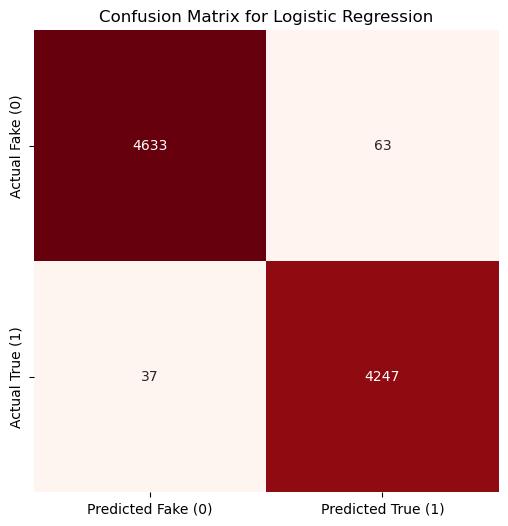

In [144]:
# Visualize Confusion Matrix
import seaborn as sns
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', cbar=False,
            xticklabels=['Predicted Fake (0)', 'Predicted True (1)'],
            yticklabels=['Actual Fake (0)', 'Actual True (1)'])
plt.title('Confusion Matrix for Logistic Regression')
plt.savefig('logistic_regression_confusion_matrix.png')
plt.show()

## Save Trained Model and Vectorizer

In [153]:
import joblib #for saving models

In [155]:
joblib.dump(logistic_model, "logistic_model.pkl")
joblib.dump(tfidf_vectorizer, "tfidf_vectorizer.pkl")

['tfidf_vectorizer.pkl']

In [159]:
print("\nSave Trained Model and Vectorizer complete.")
print("These files are now ready to be loaded by the Streamlit app.")


Save Trained Model and Vectorizer complete.
These files are now ready to be loaded by the Streamlit app.


In [161]:
pip install streamlit

Note: you may need to restart the kernel to use updated packages.
